# Transfer functions

$$
\require{color}\notag%
$$

When we previously analyzed FIR filters, it became useful to examine the discrete Fourier transform $H[m]$ of the impulse response $h[k]$.
The frequency domain view of convolutional filters immediately exposes how a filter will delay and gain (or attenuate) different frequencies.
However, as noted earlier in this chapter, the DFT cannot be applied directly to feedback systems with infinite impulse responses, and this led to our derivation of the z-Transform.

In this section, we'll return to our initial motivation, and derive something similar to $H[m]$, except from the perspective of the z-Transform rather than the DFT.
The resulting object is known as the *transfer function* of a filter, and is denoted by $H(z)$.

In [3]:
%run ../setup.ipynb

## Defining a transfer function

Let's start with a linear IIR filter in standard form:

```{math}
a[0] \cdot y[n] = \sum_{k=0}^{K-1} b[k] \cdot x[n-k] - \sum_{k=1}^{K-1} a[k] \cdot y[n-k],
```
where $b[k]$ and $a[k]$ denote the feed-forward and feed-back coefficients of the filter.

```{margin}
This is the point where the benefit of including $a[0]$ and subtracting the feedback terms (rather than adding them) pays off.
{eq}`conv-sym` would have been much more awkward without $a[0]$ and the correct sign on the feedback terms!
```
If we move all feedback terms to the left-hand side of the equation, we obtain an equivalent equation:

```{math}
:label: diff-sym

\sum_{k=0}^{K-1} a[k] \cdot y[n-k] = \sum_{k=0}^{K-1} b[k] \cdot x[n-k].
```
While this form is not useful for computing $y$, it is useful for analyzing $y$!


In particular, you might recognize that both sides of the equation are convolutions: 

```{math}
:label: conv-sym

a*y = b*x.
```
This means that if we take the z-transform of both sides, we can use the z-transform convolution theorem:

```{math}
A(z) \cdot Y(z) = B(z) \cdot X(z),
```
where $A(z), Y(z), B(z), X(z)$ denote the z-transforms of $a$, $y$, $b$, and $x$ respectively.

As long as $A(z)$ is not zero --- and it generally is non-zero except for at most $K$ specific choices of $z$ --- we can divide through to isolate $Y(z)$:

```{math}
Y(z) = \frac{B(z)}{A(z)} \cdot X(z).
```

This gives us something highly reminiscent of the convolution theorem: filtering in the time domain has again be expressed as multiplication, except now in the $z$-plane instead of the frequency domain.

````{admonition} Definition: transfer function

Let $a$ and $b$ denote the feed-back and feed-forward coefficients of a linear IIR filter:

```{math}
a[0] \cdot y[n] = \sum_{k=0}^{K-1} b[k] \cdot x[n-k] - \sum_{k=1}^{K-1} a[k] \cdot y[n-k].
```

The **transfer function** of this filter is defined as follows

```{math}
:label: transfer-function

H(z) = \frac{B(z)}{A(z)} = \frac{\sum_{k=0}^{K-1} b[k] \cdot z^{-k}}{\sum_{k=0}^{K-1} a[k] \cdot z^{-k}}
```
````

## Using transfer functions

As mentioned previously, transfer functions can be thought of as providing a generalization of the convolution theorem to support feedback filters.
Specifically, we have 

```{math}
:label: transfer-theorem

Y(z) = H(z) \cdot X(z) = \frac{B(z)}{A(z)} \cdot X(z).
```

Note that as a special case, if $a = [1]$ (so that there is no feedback in the filter), we get the z-transform
```{math}
A(z) = \sum_{k=0}^\infty a[k] \cdot z^{-k}= a[0] \cdot z^{0} = a[0] = 1.
```
In this case, the transfer function simplifies to $H(z) = B(z) / 1 = B(z)$, and we recover the convolution theorem.

More generally, we can still reason about $H(z)$ as the object that transforms the input signal $x$ into the output signal $y$.
Evaluating $H(z)$ at values of $z$ with unit magnitude --- i.e. $z= e^{\mathrm{j}\cdot \theta}$ --- produces the *frequency response* of the filter.
In Python, this is provided by the function `scipy.signal.freqz` (frequency response via z-transform).

### Example: analyzing a Butterworth filter

In {ref}`using-iir`, we constructed a Butterworth filter and rather crudely analyzed its effect on an impulse input by truncating the output $y$ and taking the DFT.
Let's revisit this example, but instead analyze it using the z-transform and transfer functions.

```{code-block} python

fs = 44100  # 44.1K sampling rate
fc = 500    # 500 Hz cutoff frequency
order = 10  # order-10 filter

b, a = scipy.signal.butter(order, fc, fs=fs)

freq, H = scipy.signal.freqz(b, a, fs=fs)
```

The result of this computation is an array `freq` of frequencies (spaced uniformly between `0` and `fs/2`), and an array `H` that evaluates the transfer function at each specified frequency.

```{margin} How many frequencies?
By default, scipy's `freqz` uses `worN=512` frequencies (up to, but not including Nyquist), but this can be easily changed to whatever frequency resolution you prefer.
Often, we are only using `freqz` to support a visual inspection of the frequency response, and for that use case, 512 frequencies is typically sufficient.
```

The figure below illustrates the response curve by plotting `freq` on the horizontal axis and `abs(h)` (in decibel scale) on the vertical axis, i.e.:

```{code-block} python

import matplotlib.pyplot as plt

# Convert |H| to decibels, with a -120dB noise floor
H_dB = 20 * np.log10(np.abs(H) + 1e-6)
plt.plot(freq, H_dB)
```

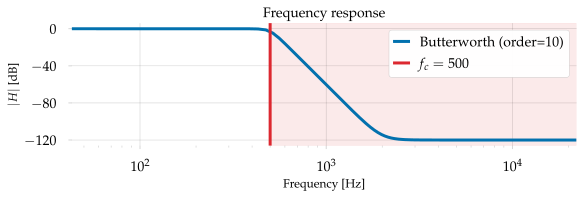

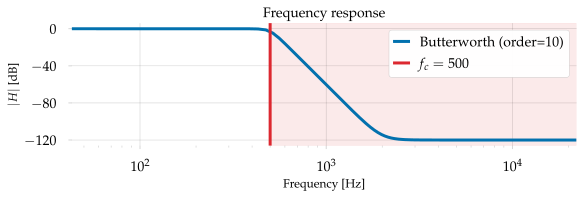

In [179]:
# fs = 44100  # 44.1K sampling rate
fc = 500    # 500 Hz cutoff frequency
order = 10  # order-10 filter
b, a = scipy.signal.butter(order, 500, fs=fs)
freq, H = scipy.signal.freqz(b, a, fs=fs)

fig, ax = plt.subplots(figsize=figaspect(0.33))
ax.semilogx(freq, 20 * np.log10(np.abs(H) + 1e-6), label='Butterworth (order=10)')
ax.axvline(fc, color=colors[1], label=r'$f_c = 500$')
ax.legend(loc='upper right')
ax.set(xlabel='Frequency [Hz]', ylabel='$|H|$ [dB]', title='Frequency response');
ax.set(yticks=[0, -40, -80, -120])#, xticks=[1e-1, fc, fs /2], xlim=[1e-1, fs/2], xticklabels=[0, r'$f_c$', 'Nyquist'])
ax.axvspan(fc, fs/2, color=colors[1], alpha=0.1, zorder=-1)
ax.label_outer()

glue('buttresponse', fig);

```{glue:figure} buttresponse

The frequency response curve $|H(z)|$ for an order-10 Butterworth filter with a cutoff frequency at $f_c=500$ Hz and sampling rate $f_s=44100$.
```

Note that we never had to construct a test signal to generate this curve: all of the information was inferred from the filter coefficients `b` and `a`!

(elliptic-transfer)=
### Example: phase response of an elliptic filter

Just like with convolutional filters, we can infer delay properties of IIR filters by looking at the phase spectrum contained in $H(z)$.
This can be done directly, e.g., by calling `scipy.signal.freqz` and then using `np.unwrap(np.angle(h))` to compute the unwrapped phase.
Alternatively, it is usually more convenient to use the already provided `group_delay` function, as demonstrated below for an elliptic filter.

```{code-block} python
fs = 44100  # Sampling rate
fc = 500  # Cutoff frequency
fstop = 600
attenuation = 80  # we'll require 80 dB attenuation in the stop band
ripple = 3  # we'll allow 3 dB ripple in the passband

order_ell, wn = scipy.signal.ellipord(fc, fstop, ripple, attenuation, fs=fs)
b_ell, a_ell = scipy.signal.ellip(order, ripple, attenuation, wn, fs=fs)

# scipy's group delay measures in samples
# we'll convert to seconds by dividing out the sampling rate
freq, delay = scipy.signal.group_delay([b_ell, a_ell], fs=fs)
delay_sec = delay / fs
```

Note that `scipy.signal.group_delay` returns the delay for each measured frequency in `freq` in units of ``[samples]``.
To convert the delay measurements to ``[seconds]``, we divide by the sampling rate ``fs``.
A visualization of the resulting group delay (along with the frequency response) is provided below.

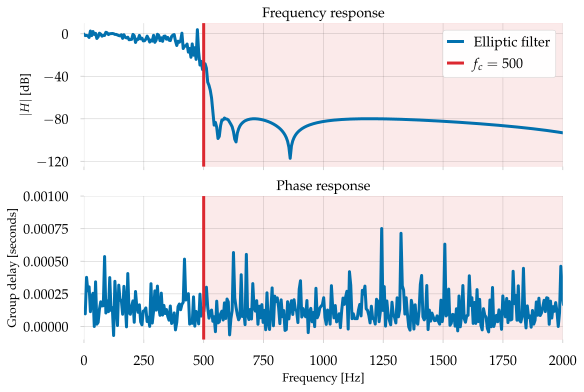

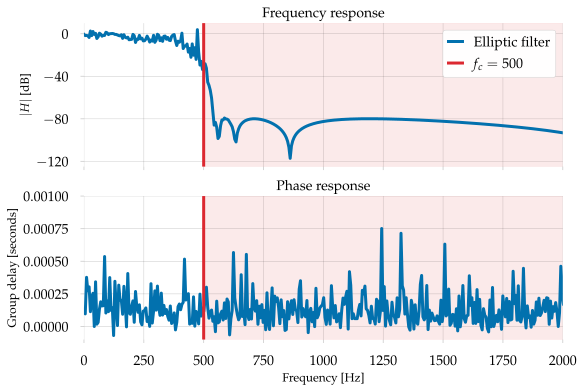

In [214]:
fs = 44100  # Sampling rate
fc = 500  # Cutoff frequency
fstop = 600
attenuation = 80  # we'll require 80 dB attenuation in the stop band
ripple = 3  # we'll allow 3 dB ripple in the passband

order_ell, wn = scipy.signal.ellipord(fc, fstop, ripple, attenuation, fs=fs)
b_ell, a_ell = scipy.signal.ellip(order, ripple, attenuation, wn, fs=fs)

fig, (ax0, ax1) = plt.subplots(figsize=figaspect(2./3), nrows=2, sharex=True)

freq, h = scipy.signal.freqz(b_ell, a_ell, worN=4096, fs=fs)

ax0.plot(freq, 20 * np.log10(np.abs(h) + 1e-6), label='Elliptic filter')
ax0.axvline(fc, color=colors[1], label=r'$f_c = 500$')
ax0.legend(loc='upper right')
ax0.set(xlabel='Frequency [Hz]', ylabel='$|H|$ [dB]', title='Frequency response');
ax0.set(yticks=[0, -40, -80, -120])
ax0.axvspan(fc, fs/2, color=colors[1], alpha=0.1, zorder=-1)
ax0.label_outer()


# scipy's group delay measures in samples
# we'll convert to seconds by dividing out the sampling rate
freq, delay = scipy.signal.group_delay([b_ell, a_ell], w=4096, fs=fs)
delay_sec = delay / fs


ax1.plot(freq, delay_sec, label='Elliptic filter')
ax1.axvline(fc, color=colors[1], label=r'$f_c = 500$')
ax1.set(xlabel='Frequency [Hz]', ylabel='Group delay [seconds]', title='Phase response');
ax1.axvspan(fc, fs/2, color=colors[1], alpha=0.1, zorder=-1)
ax1.set(xlim=[0, 2000], ylim=[-0.0001, 0.001])
ax1.label_outer()

glue('ellipanalysis', fig)

```{glue:figure} ellipanalysis

The frequency response curve $|H(z)|$ (*top*) and phase response curve (group delay, *bottom*) for an elliptic filter with cutoff $f_c=500$, transition bandwidth of 100 Hz, 3dB passband ripple, and 80dB stop-band attenuation ($f_s=44100$).
The plot is limited to the frequency range [0, 2000] so that the trends within the passband are easier to see.
```

## Why not use the DTFT?

Everything we've done so far only depends on $z$ with unit magnitude: frequency response and phase response are both properties of $H\left(e^{j\cdot \theta}\right)$, which we can think of as computing the discrete-time Fourier transform (DTFT).
At this point, it is completely reasonable to wonder why we needed to define the z-transform to support any complex number $z$, instead of just those points on the unit circle.

As we will see in the next section, expanding the definition to include all complex $z$ allows us to study the *stability* of a filter, and this would not be possible with just the DTFT.